## Preprocessing, Feature Extraction and Pipelines

So far we have loaded and directly used toy datasets. However, in real problems, it is often necessary to pre-process the data, put it in the correct format (a 2-dimensional array in the shape of `[num_points, num_features]` for `scikit-learn`), converting categorical data, text etc. to numerical data (needed for most methods), and/or extract additional features. The `scikit-learn` module contains functionality to do these. Majority of this functionality can be found under the `preprocessing`, `feature_extraction` and `pipeline` submodules.


In [1]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# New submodules
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import pipeline

### Scaling

Features of a dataset can be of different scales (e.g. salary vs age). This usually has a detrimental effect on many machine learning algorithms. As such, transforming features to have similar scales is widely used. Some methods for scaling:

* **Z-Normalization:** Transform each dimension of the data to have 0 mean and 1 standard deviation.
* **Min-Max Scaling:** Transform each dimension of the data so that it falls between two values. Usually this range is chosen as [0,1] or [-1,1].
* **Max Absolute Value Scaling:** To transform the absolute value of each dimension of the data to be less than a certain value. Usually this value will be 1.
* **Robust Scaling:**  *Outlier* values in the data can adversely affect scaling operations. A scaling approach using median and quartile ranges may be preferable in when outliers are present. .
* **Whitening:** Scaling and decorelating multiple dimensions to have 0-vector mean and unit covariance. We will see this when we go over Principal Component Analysis. ([Wikipedia entry](https://en.wikipedia.org/wiki/Whitening_transformation))

**Note:** Care should be taken if the data containing too many 0s (sparse data) is to be preprocessed. It is easy to deteriorate their sparse structure, leading to many issues. The methods that change the *center* of the data is the main culprit (e.g. z-normalization). Methods that keep the sparse nature intact should be chosen (e.g. max absolute value scaling)


In [2]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.],
              [ 1.,  0.,  1.]])
print("Original:")
print(X)

Original:
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]
 [ 1.  0.  1.]]


Z-Normalization:

In [3]:
Xzn = preprocessing.scale(X)
print("Z-Normalized:")
print(Xzn)

Z-Normalized:
[[ 0.         -1.41421356  1.34164079]
 [ 1.41421356  0.         -0.4472136 ]
 [-1.41421356  1.41421356 -1.34164079]
 [ 0.          0.          0.4472136 ]]


In [4]:
print("Before: Mean and Standard Deviation")
print(X.mean(axis = 0), X.std(axis = 0))
print()
print("After: Mean and Standard Deviation")
print(Xzn.mean(axis = 0), Xzn.std(axis = 0))

Before: Mean and Standard Deviation
[1.  0.  0.5] [0.70710678 0.70710678 1.11803399]

After: Mean and Standard Deviation
[0.00000000e+00 0.00000000e+00 1.38777878e-17] [1. 1. 1.]


In [5]:
# Keeping the scaling information:
scaler = preprocessing.StandardScaler()

# Calcualte the scaling values:
scaler.fit(X) 
print("Scaling Class:")
print(scaler)
print()
print("Scaling Values:")
print(scaler.mean_, scaler.scale_)

Scaling Class:
StandardScaler()

Scaling Values:
[1.  0.  0.5] [0.70710678 0.70710678 1.11803399]


In [6]:
print("Z-Normalized:")

# Scale the incoming data
print(scaler.transform(X))

# TRANSFORMER API!!!

# fit(train) + transform(train) + transform(test)
# fit_transform(train) + transform(test)

Z-Normalized:
[[ 0.         -1.41421356  1.34164079]
 [ 1.41421356  0.         -0.4472136 ]
 [-1.41421356  1.41421356 -1.34164079]
 [ 0.          0.          0.4472136 ]]


MinMax

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()

# Calculate the scaling values and scale the original data in a single line
Xmm = min_max_scaler.fit_transform(X)
print("Original")
print(X)
print()
print("Range [0, 1]:")
print(Xmm)
print()

print("Scaling Values:")
print(min_max_scaler.scale_, min_max_scaler.min_)

Original
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]
 [ 1.  0.  1.]]

Range [0, 1]:
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]
 [0.5        0.5        0.66666667]]

Scaling Values:
[0.5        0.5        0.33333333] [0.         0.5        0.33333333]


In [8]:
min_max_scaler.inverse_transform(Xmm)

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 1.,  0.,  1.]])

In [9]:
Y = np.array([[1.5, -1., 2.5]])
print("When new data comes: ") 
print(Y)
print(min_max_scaler.transform(Y))
print()

When new data comes: 
[[ 1.5 -1.   2.5]]
[[0.75       0.         1.16666667]]



In [10]:
print("Original")
print(X)
print()
print("Range [-1, 1] ")
min_max_scaler_range = preprocessing.MinMaxScaler(feature_range = [-1, 1])

print(min_max_scaler_range.fit_transform(X)) 

Original
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]
 [ 1.  0.  1.]]

Range [-1, 1] 
[[ 0.         -1.          1.        ]
 [ 1.          0.         -0.33333333]
 [-1.          1.         -1.        ]
 [ 0.          0.          0.33333333]]


Absolute Value Scaling (Better for Sparse Data)

In [11]:
max_abs_scaler = preprocessing.MaxAbsScaler()
Xma = max_abs_scaler.fit_transform(X)
print("Original")
print(X)
print()
print("Absolute Value to 1:")
print(Xma)
print()
print("Scaling:")
print(max_abs_scaler.scale_)
print()

Original
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]
 [ 1.  0.  1.]]

Absolute Value to 1:
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]
 [ 0.5  0.   0.5]]

Scaling:
[2. 1. 2.]



In [12]:
print("With different data")
Y = np.array([[ -3., -1.,  4.]])
print(Y)
print(max_abs_scaler.transform(Y))

With different data
[[-3. -1.  4.]]
[[-1.5 -1.   2. ]]


Scaling with Outliers

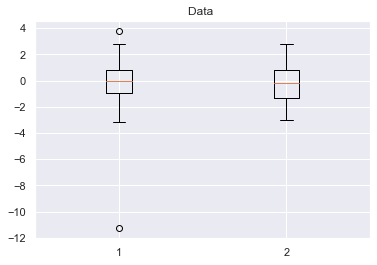

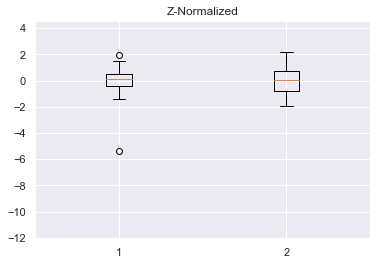

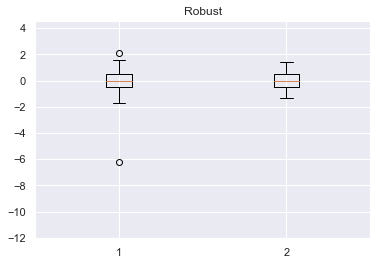

In [13]:
# Random data generation
Xo = np.random.standard_t(2, (50,2))
plt.boxplot(Xo)
plt.title("Data ")
down, up = plt.ylim()
plt.show()

z_scaler = preprocessing.StandardScaler()
Xz = z_scaler.fit_transform(Xo)
plt.boxplot(Xz)
plt.title("Z-Normalized")
plt.ylim(down, up)
plt.show()

robust_scaler = preprocessing.RobustScaler()
Xrs = robust_scaler.fit_transform(Xo)
plt.boxplot(Xrs)
plt.title("Robust")
plt.ylim(down, up)
plt.show()


In [16]:
from sklearn import datasets
bc_dataset = datasets.load_breast_cancer()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b52326b3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b52326b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b52326b130>],
 'medians': [<matplotlib.lines.Line2D at 0x1b52326bdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5232790d0>],
 'means': []}

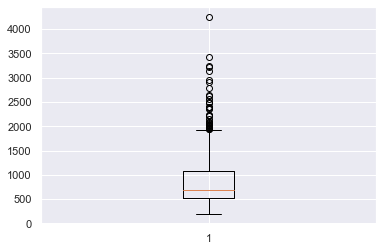

In [17]:
plt.boxplot(bc_dataset["data"][:,-7])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5232cbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5232da4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5232cbc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5232daa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5232dad60>],
 'means': []}

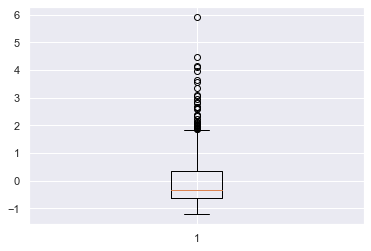

In [20]:
plt.boxplot(preprocessing.StandardScaler().fit_transform(bc_dataset["data"][:,-7].reshape(-1,1)))

{'whiskers': [<matplotlib.lines.Line2D at 0x1b523336850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b523336df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b523336580>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5233463d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5233466a0>],
 'means': []}

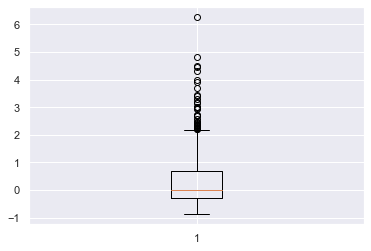

In [21]:
plt.boxplot(preprocessing.RobustScaler().fit_transform(bc_dataset["data"][:,-7].reshape(-1,1)))

Some data is inherently multi-dimensional (e.g. orientation of a rigid body) and thus it is not appropriate to scale them by-themselves. We need to scale them together. One such method is data whitening. Another method is unit normalization where we normalize the data points (or a feature subset of the data points)  to have unit norm.

In [22]:
print("Original:")
print(X)
print()

Xn = preprocessing.normalize(X, norm = "l2")
print("Normalize to Unit Vectors:")
print(Xn)
print()

# when you need a class (e.g. to put in a pipeline)
normalizer = preprocessing.Normalizer()
print(normalizer)

Original:
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]
 [ 1.  0.  1.]]

Normalize to Unit Vectors:
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.70710678  0.          0.70710678]]

Normalizer()


In [23]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 0.70710678,  0.        ,  0.70710678]])

In [24]:
# Doesn't do anything but it is there so that since the Normalizer class 
# fully implements the Transformer API (useful for using it in a pipeline)
normalizer.fit(X)

Normalizer()

We will talk about Data Whitening when we cover Principal Component Analysis

### Categorical Data Encoding

Many learning algorithms expect numerical values (vector, matrix, etc.) as input. Therefore, it is necessary to encode categorical data this way. For example, consider customer data: `[gender, city, occupation]`. Let there be `[female, male]` for gender, `[ankara, istanbul, izmir]` for city, and `[private, public, freelance, retired]` for occupation.

How can we convert categories to numbers?

In [26]:
enc = preprocessing.OneHotEncoder()

In [27]:
M = [["male", "ankara", "public"], 
     ["female", "istanbul", "private"],
     ["female", "izmir", "retired"],
     ["male", "istanbul", "freelance"]]

In [28]:
# Getting the categories from the data
enc.fit(M)

OneHotEncoder()

In [31]:
print("Encoder:")
print(enc)

Encoder:
OneHotEncoder()


In [32]:
print("Encoding:")

Encoding:


In [33]:
# 2 (gender) + 3 (city) + 4 (occupation) = 9 dimensional
print(enc.transform(M).toarray())

[[0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0.]]


In [34]:
# New data
print(enc.transform([["female", "istanbul", "freelance"],
                     ["male", "ankara", "retired"]]).toarray())

[[1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1.]]


In [35]:
print("Categories:")
print(enc.categories_)

Categories:
[array(['female', 'male'], dtype=object), array(['ankara', 'istanbul', 'izmir'], dtype=object), array(['freelance', 'private', 'public', 'retired'], dtype=object)]


**Note:** It is a better idea to map binary categories to a single dimension (0-1) instead of a 2 dimensional 1-hot vector

In [36]:
enc.transform([["female", "izmir", "engineer"]]).toarray()

ValueError: Found unknown categories ['engineer'] in column 2 during transform

In [37]:
# Giving categories by hand
gender = ["female", "male"] 
city = ["ankara", "istanbul", "izmir", "kocaeli"]
occupation = ["private", "public", "freelance", "retired"]

enc2 = preprocessing.OneHotEncoder(categories = [gender, city, occupation])
print("Encoder:")
print(enc2)

Encoder:
OneHotEncoder(categories=[['female', 'male'],
                          ['ankara', 'istanbul', 'izmir', 'kocaeli'],
                          ['private', 'public', 'freelance', 'retired']])


In [38]:
print(enc2.transform([["kadın", "istanbul", "freelance"],
                      ["erkek", "kocaeli", "retired"]]).toarray())

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
# We still need to call the fit
enc2.fit(M)

OneHotEncoder(categories=[['female', 'male'],
                          ['ankara', 'istanbul', 'izmir', 'kocaeli'],
                          ['private', 'public', 'freelance', 'retired']])

In [41]:
print("Encoding:")

Encoding:


In [42]:
print(enc2.transform([["female", "istanbul", "freelance"],
                      ["male", "kocaeli", "retired"]]).toarray())

[[1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [43]:
# If there is a chance of getting an unexpected category (e.g. missing data)
enc3 = preprocessing.OneHotEncoder(handle_unknown = "ignore")

In [44]:
enc3.fit(M) 

OneHotEncoder(handle_unknown='ignore')

In [45]:
print("Encoder:")
print(enc3)

Encoder:
OneHotEncoder(handle_unknown='ignore')


In [46]:
print("Unknown category is mapped to a 0-vector of appropriate size:")
print(enc3.transform([["female", "bursa", "public"]]).toarray())

Unknown category is mapped to a 0-vector of appropriate size:
[[1. 0. 0. 0. 0. 0. 0. 1. 0.]]


Sometimes data comes in a dictionary format (e.g. JSON). There is the `DictVectorizer` class for these cases

In [47]:
from sklearn.feature_extraction import DictVectorizer

In [50]:
dictData = [
    {"price": 1200000, "room": 4, "neighborhood": "Maslak", "purpose": "business"},
    {"price": 1400000, "room": 3, "neighborhood": "Etiler", "purpose": "house"},
    {"price":  500000, "room": 3, "neighborhood": "Tuzla",  "purpose": "house"},
    {"price":  900000, "room": 2, "purpose": "business", "neighborhood": "Etiler"}]

In [51]:
vec = DictVectorizer(sparse = False, dtype = int)

In [52]:
print(vec.fit_transform(dictData))

[[      0       1       0 1200000       1       0       4]
 [      1       0       0 1400000       0       1       3]
 [      0       0       1  500000       0       1       3]
 [      1       0       0  900000       1       0       2]]


In [53]:
vec.feature_names_

['neighborhood=Etiler',
 'neighborhood=Maslak',
 'neighborhood=Tuzla',
 'price',
 'purpose=business',
 'purpose=house',
 'room']

**Note:** It only converts strings to one-hot vectors. If the categorical data is given with integers, we need to use the `OneHotEncoder` class.

### Filling Missing Data: Imputation

Some portions of real-world data is often missing. There are different ways to deal with this. The simplest and most commonly used methods include using the mean, median, mode, or a constant value to fill the missing data. 

Ignoring data points with missing features or using machine learning to fill them are also common.

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
X = np.array([[1, 2], 
              [np.nan, 3], 
              [7, 6], 
              [5, 3], 
              [4, 4]])

In [56]:
print("Initial Data")
print(X) 

Initial Data
[[ 1.  2.]
 [nan  3.]
 [ 7.  6.]
 [ 5.  3.]
 [ 4.  4.]]


In [57]:
# Mean
imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp.fit_transform(X)

array([[1.  , 2.  ],
       [4.25, 3.  ],
       [7.  , 6.  ],
       [5.  , 3.  ],
       [4.  , 4.  ]])

In [58]:
Xe = np.array([[np.nan, 2], 
               [6, np.nan], 
               [7, 6]])
print("New Data")
print(Xe)

New Data
[[nan  2.]
 [ 6. nan]
 [ 7.  6.]]


In [59]:
print("Mean:")
print(imp.transform(Xe))  

Mean:
[[4.25 2.  ]
 [6.   3.6 ]
 [7.   6.  ]]


In [60]:
imp.statistics_

array([4.25, 3.6 ])

In [61]:
# Median
imp2 = SimpleImputer(missing_values = -999, strategy = "median")

In [62]:
X = np.array([[1,    2], 
              [-999, 3], 
              [7,    6]])

In [63]:
print("Initial Data")
print(X)
print()

Initial Data
[[   1    2]
 [-999    3]
 [   7    6]]



In [69]:
imp2.fit(X)

SimpleImputer(missing_values=-999, strategy='median')

In [70]:
Xe = np.array([[-999,   2], 
               [6,   -999], 
               [7,      6]])

In [71]:
print("New Data")
print(Xe)
print()

New Data
[[-999    2]
 [   6 -999]
 [   7    6]]



In [72]:
print("Median:")
print(imp2.transform(Xe))

Median:
[[4. 2.]
 [6. 3.]
 [7. 6.]]


In [68]:
Xt = imp2.fit_transform(X)
print(Xt)

[[1. 2.]
 [4. 3.]
 [7. 6.]]


In [73]:
df = pd.DataFrame([["a", "y"],
                   [np.nan, "x"],
                   ["a", np.nan],
                   ["b", "y"]], dtype = "category")

display(df)

,0,1
0,a,y
1,NaN,x
2,a,NaN
3,b,y


In [74]:
print("Most common based on available categories in the Dataframe:")

Most common based on available categories in the Dataframe:


In [75]:
imp3 = SimpleImputer(strategy = "most_frequent")
tmp = imp3.fit_transform(df)

In [76]:
print(tmp)
print(type(tmp))

[['a' 'y']
 ['a' 'x']
 ['a' 'y']
 ['b' 'y']]
<class 'numpy.ndarray'>


In [79]:
print("Pandas Dataframe")
df


Pandas Dataframe


,0,1
0,a,y
1,NaN,x
2,a,NaN
3,b,y


In [80]:
print("Fill with Constant:")
imp4 = SimpleImputer(strategy = "constant", fill_value = "c")
print(imp4.fit_transform(df))

Fill with Constant:
[['a' 'y']
 ['c' 'x']
 ['a' 'c']
 ['b' 'y']]


In [81]:
df.fillna(method = "bfill")

,0,1
0,a,y
1,a,x
2,a,y
3,b,y


Missing data imputation can be formulated as a prediction problem. For this, we treat the feature to be imputed as the target data and the remaining features as the input data. A predictor is trained with the rows that do not have the missing feature. Then the missing features for the remaining rows are filled with the predictions. This is done in a round-robin fashion. This usually performs better in practise then the other methods. 

We use the `IterativeImputer` class for this.

In [82]:
# Depending on your scikit-learn version you may or may not need the below line
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [83]:
# Chose the predictor: 
ite_imp = IterativeImputer(estimator = LinearRegression())

In [84]:
X = np.array([[7, 2, 3], 
              [4, np.nan, 6], 
              [10, 5, 9]])

In [86]:
print(X)

[[ 7.  2.  3.]
 [ 4. nan  6.]
 [10.  5.  9.]]


In [87]:
ite_imp.fit_transform(X)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  2.6,  6. ],
       [10. ,  5. ,  9. ]])

In [88]:
Xe = np.array([[np.nan, 2, 3], 
               [4, np.nan, 6], 
               [10, np.nan, 9]])

In [89]:
print(Xe)

[[nan  2.  3.]
 [ 4. nan  6.]
 [10. nan  9.]]


In [90]:
ite_imp.transform(Xe)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  2.6,  6. ],
       [10. ,  5. ,  9. ]])

In [91]:
Xe2 = np.array([[np.nan, 3, 12], 
               [14, np.nan, 3], 
               [0, np.nan, 19]])

In [92]:
ite_imp.transform(Xe2)

array([[-6. ,  3. , 12. ],
       [14. ,  3.4,  3. ],
       [ 0. ,  7. , 19. ]])

**Go Over This At Home**

For a wide variety of categorical encoders (including the famous weight of evidence in banking): https://contrib.scikit-learn.org/category_encoders/.


In [93]:
import category_encoders as ce

encoder = ce.WOEEncoder(cols = [...])

ModuleNotFoundError: No module named 'category_encoders'

### Polynomial Features

Some problems benefit from non-linearity. One way to get this is to create non-linear features from data. Linear estimators can be turned into non-linear ones this way. One of the most common ways of doing this is to add polynomials of the inputs. We can do this with the `PolynomialFeatures` class. 

Another common method is to use RBF functions but we will cover it in the regression part of the lecture. There are also others. Nowadays however, we rely more on the non-linearity of the methods instead of extracting non-linear features.

In [99]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [100]:
Xp = np.arange(6).reshape(3, 2)
print("Original:")
print(Xp)

Original:
[[0 1]
 [2 3]
 [4 5]]


In [98]:
poly = PolynomialFeatures(2) #exhaustive to 2nd degree
print("With polynomial features added: 1 x1 x2 (x1)^2 x1*x2 (x2)^2")
print(poly.fit_transform(Xp))

With polynomial features added: 1 x1 x2 (x1)^2 x1*x2 (x2)^2
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [101]:
poly2 = PolynomialFeatures(degree = 2, 
                           interaction_only = True, 
                           include_bias = False)
print("Sadece etkileşim Polinom Öznitelikleri Eklenmiş: x1 x2 x1x2")
print(poly2.fit_transform(Xp))

Sadece etkileşim Polinom Öznitelikleri Eklenmiş: x1 x2 x1x2
[[ 0.  1.  0.]
 [ 2.  3.  6.]
 [ 4.  5. 20.]]


### Custom Functions for Preprocessing

Sometimes we want to use custom functions for preprocessing (e.g. taking the logarithm to make a feature more symmetric). There are multiple ways of doing this. However, the below one is recommended so that we can include them easily in Pipelines.

In [102]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [103]:
transformer = FunctionTransformer(np.log1p, validate = True)

In [104]:
Xt = np.array([[0, 1], [2, 3]])
print(Xt)

[[0 1]
 [2 3]]


In [105]:
print(np.log1p(Xt))

[[0.         0.69314718]
 [1.09861229 1.38629436]]


In [106]:
print(transformer.transform(Xt))

[[0.         0.69314718]
 [1.09861229 1.38629436]]


### Text Features

We need to convert text data into numerical values so that we can use it in ML algorithms. There are many approaches towards this end. `scikit-learn` provides implementations for two older but still useful methods. The first one is the `bag-of-words` model which uses word counts directly and the other one is the `tf-idf` model which trade-ofss the counts of the words with their commonality (if a word is common everywhere, it may not be important).

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [108]:
example = ["It is hot today", 
           "The hot hot and sour soup", 
           "Air, water, road and electricity", 
           "On the road today"]

In [109]:
print("Count Based")
vec = CountVectorizer()
Xbow = vec.fit_transform(example)
display(pd.DataFrame(Xbow.toarray(), columns = vec.get_feature_names()))


Count Based


C:\Users\Hamza\anaconda3\envs\aima\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,air,and,electricity,hot,is,it,on,road,soup,sour,the,today,water
0,0,0,0,1,1,1,0,0,0,0,0,1,0
1,0,1,0,2,0,0,0,0,1,1,1,0,0
2,1,1,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,0,1,1,0


In [110]:
print("TF-IDF")
vec2 = TfidfVectorizer()
Xtfidf = vec2.fit_transform(example)
display(pd.DataFrame(Xtfidf.toarray(), columns = vec.get_feature_names()))

TF-IDF


C:\Users\Hamza\anaconda3\envs\aima\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,air,and,electricity,hot,is,it,on,road,soup,sour,the,today,water
0,0.000000,0.000000,0.000000,0.437791,0.555283,0.555283,0.000000,0.000000,0.000000,0.000000,0.000000,0.437791,0.000000
1,0.000000,0.329376,0.000000,0.658753,0.000000,0.000000,0.000000,0.000000,0.417772,0.417772,0.329376,0.000000,0.000000
2,0.485461,0.382743,0.485461,0.000000,0.000000,0.000000,0.000000,0.382743,0.000000,0.000000,0.000000,0.000000,0.485461
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590819,0.465809,0.000000,0.000000,0.465809,0.465809,0.000000


We will use these features in a little bit.

### Pipelining Pre-Processing, Feature Extraction and Prediction Steps

In most machine learning applications, we perform several "operations" to the data before inputting them to a learning algorithm.

For example:  
1. Fill the missing values with means 
2. Scale the data to the [0,1] range
3. Add second degree polynomial features
4. Fit a linear model to the data

The data enters the learning process after undergoing some transformation. We have seen the Transformer API before which are for the transformation algorithms. This API defines the `fit()` and `transform()` functions along with the `fit_transform()` function, that does both in a single step.

The `scikit-learn` module has `pipeline` functionality to abstract and simplify this process. This abstraction represents the input of data passing through multiple transformers into an estimator in its final form. Let's see how it is used:



In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [112]:
                     # 1. Fill the missing values with means 
pipe = make_pipeline(SimpleImputer(missing_values = np.nan, strategy = "mean"),
                     # 2. Scale the data to the [0,1] range                     
                     preprocessing.MinMaxScaler(),
                     # 3. Add second degree polynomial features
                     PolynomialFeatures(degree = 2),
                     # 4. Fit a linear model to the data
                     LinearRegression())

In [113]:
print(type(pipe))

<class 'sklearn.pipeline.Pipeline'>


In [114]:
print(pipe)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


In [115]:
# We can also label the steps (useful for later)
from sklearn.pipeline import Pipeline
steps = [("impute", SimpleImputer(missing_values = np.nan, strategy = "mean")), 
         ("scale", preprocessing.MinMaxScaler()),
         ("poly", PolynomialFeatures(degree = 2)),
         ("learn", LinearRegression())]

In [116]:
pipe2 = Pipeline(steps)
print(pipe2)

Pipeline(steps=[('impute', SimpleImputer()), ('scale', MinMaxScaler()),
                ('poly', PolynomialFeatures()), ('learn', LinearRegression())])


The resulting Pipeline object implements `fit` and `predict` functions.

In [119]:
# Input
Xpp = np.array([[ np.nan, 0,   3  ],
                [ 3,      7,   9  ],
                [ 3,      5,   2  ],
                [ 4, np.nan,   6  ],
                [ 8,      8,   1  ]])


In [120]:
# Target
ypp = np.array([14.2, 15.9, -1.01,  7.93, -5.2])

In [121]:
# Fitting
pipe.fit(Xpp, ypp)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [122]:
print("Training Targets:")
print(ypp)

Training Targets:
[14.2  15.9  -1.01  7.93 -5.2 ]


In [123]:
print("Training Predictions:")
print(pipe.predict(Xpp))

Training Predictions:
[14.2  15.9  -1.01  7.93 -5.2 ]


In [124]:
XppTest = np.array([[     2,      6, np.nan],
                    [np.nan, np.nan, np.nan]])

In [125]:
print("Test Prediction:")
print(pipe.predict(XppTest))

Test Prediction:
[1.32330278 3.28467532]


We can create pipelines with any number of transformers and optionally a single predictor at the end.

In effect, pipelines perform back to back `fit_transform` operations and feed the outputs of prior transformers as the inputs of the next ones. They are mostly multi-input and multi-output and apply the same step to all the measurements. (some only accept 1D data and output 1D data, you can custom write transformers that apply different operations to different dimensions) 

**Is this good enough?**

In [126]:
# Input
Xpp2 = np.array([[ np.nan, 'a',   3  ],
                 [ 3,      'b',   9  ],
                 [ 3,      'a',   2  ],
                 [ 4, np.nan,   6  ],
                 [ 8,      'c',   1  ]])

# Target
ypp2 = np.array([14.2, 15.9, -1.01,  7.93, -5.2])

In [127]:
pipe2.fit(Xpp2,ypp2)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'a'

**Not Enough:**  
* What if we have different data types? The transformers in question are designed mostly for a single type of data (e.g. scalers vs categoric variables). 
* What if we want to apply different pre-processing steps to same type of data? (e.g. log transform to count variables and keeping the others as is before scaling)
* What if we want to extract multiple types of features in parallel? (e.g. polynomial and radial basis for regression)?

For these, we are going to use the `ColumnTransformer` and `FeatureUnion` classes. Before those, let's do an exercise

**Exercise:** The  20 newsgroups (`fetch_20newsgroups`) dataset within `scikit-learn` can be used to define text classification problems. The below code cell downloads the data and sets up the input and the target. Extract suitable features and perform classification. Be principled as you can and try to use pipelines.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the data
# Warning: This dataset needs to be downloaded which may be affected by your internet connection.
categories = ['alt.atheism',
              'talk.religion.misc']

data = fetch_20newsgroups(subset='train', categories=categories)
X = data['data']
y = data['target']
